### Le chemin de nos données

In [1]:
path = "./data/"

### Chargement des données

In [2]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

c:\Users\elgue\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Exemple de chargement de données

In [3]:
labels = ['angry', 'sad','happiness','crying','disgusted','fear']

x_train, y_train = load_data(path, labels, dataset='train', image_size=64)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=64)
print(x_test.shape, y_test.shape)

(804, 64, 64, 3) (804, 1)
(391, 64, 64, 3) (391, 1)
(431, 64, 64, 3) (431, 1)


In [4]:
#generate the more data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [5]:
from outils.model import create_model_vgg19
from outils.model import create_model_simple
from tensorflow.keras import optimizers



model = create_model_simple() 
# model.compile(loss=...,
#            optimizer=optimizers.Adam(learning_rate=3e-4),
#             metrics=['accuracy'])

model.summary()
 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])





c:\Users\elgue\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451,238 (1.72 MB)

 Trainable params: 451,238 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history =model.fit(train_datagen.flow(x_train, y_train, batch_size=10),
                    validation_data=(x_val, y_val),
                    epochs=50,
                    )

Epoch 1/50


c:\Users\elgue\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2104 - loss: 9.8236 - val_accuracy: 0.1995 - val_loss: 2.4238
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2931 - loss: 1.7939 - val_accuracy: 0.2379 - val_loss: 1.9301
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2685 - loss: 1.7743 - val_accuracy: 0.2481 - val_loss: 2.0381
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3143 - loss: 1.7197 - val_accuracy: 0.2174 - val_loss: 1.8467
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3205 - loss: 1.7199 - val_accuracy: 0.2225 - val_loss: 2.0825
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3378 - loss: 1.6181 - val_accuracy: 0.2430 - val_loss: 1.9860
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3363 - loss: 1.5892 - val_accuracy: 0.2583 - val_loss: 1.9498
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3357 - loss: 1.6126 - val_accuracy: 0.2404 - val_loss: 1.

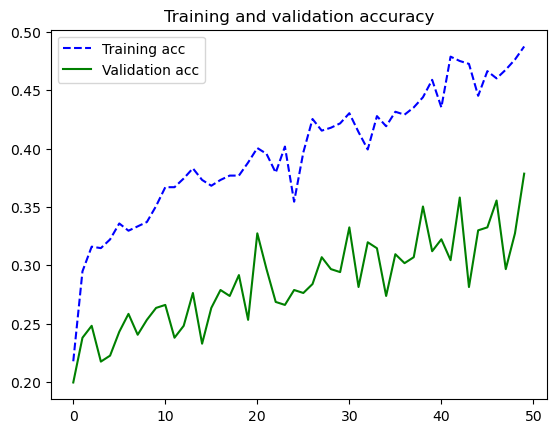

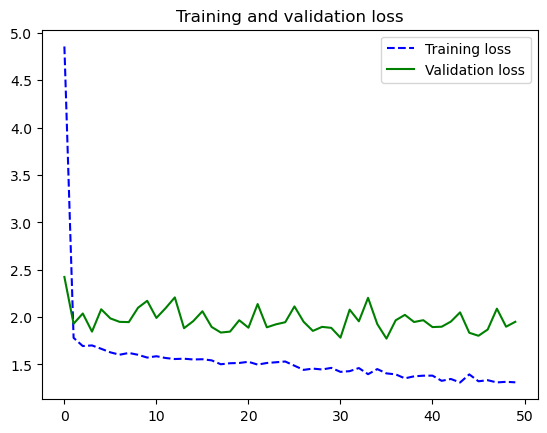

In [7]:
import matplotlib.pyplot as plt
from outils.analysis import plot_training_analysis

def plot_training_analysis(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  
plot_training_analysis(history)